Estimated Rate: 0.2625526

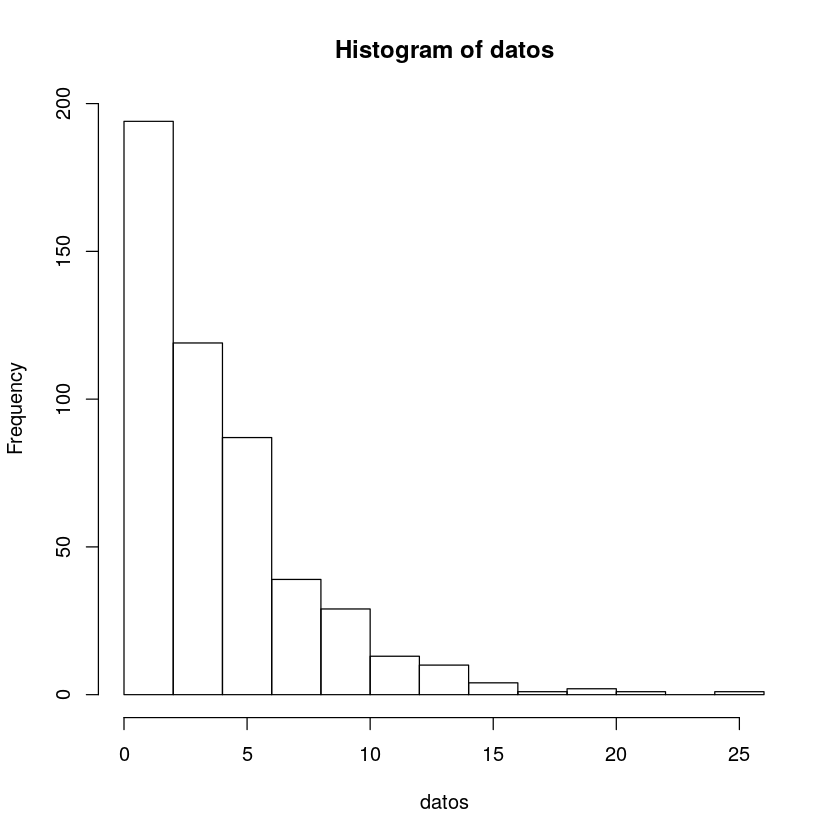

In [51]:
# Vamos a replicar el ejercicio del siguiente material
# Fuente: http://www.csd.uoc.gr/~hy439/labs/lab2_fitting_probability_distributions.pdf
# https://drive.google.com/file/d/0B-dmEvN59Z2ZR19yVWhfd29mcFE/view

library(vcd)
library(MASS)
library(car)

# Generamos 100 valores aleatorios de la siguiente distribución
# valores ~ Exp(1/lambda=4)
set.seed(0)
valores_exp <- rexp(500, 1/4)

# Generamos ruido gaussiano
# ruido ~ Z(0,1)
ruido <- rnorm(500)

# Consideremos datos como la observaciones que queremos ajustar
datos <- valores_exp + abs(ruido)
hist(datos)

# Calculamos los parámetros
# fitdistr{MASS}
# Maximum-likelihood Fitting of Univariate Distributions

fitexp <- fitdistr(datos, "exponential")

# Nuestros datos se ajustan a una distribución exponencial con
cat("Estimated Rate:", fitexp$estimate)

For Exponential distribution p-value is: 0.03401561 


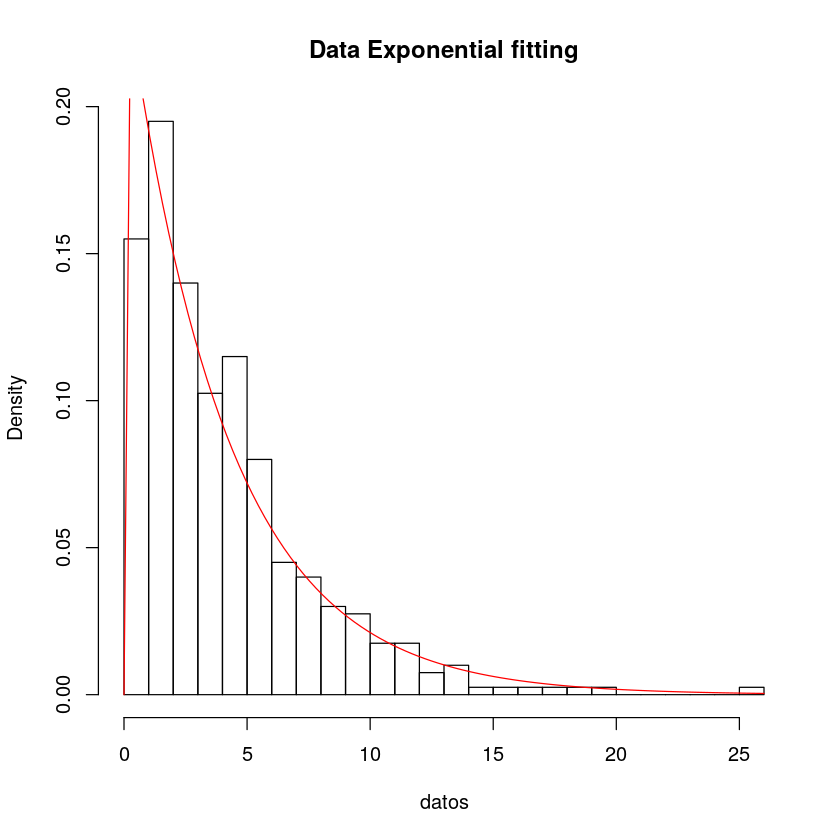

In [33]:
# Haremos un test Kolmogorov-Smirnov para una muestra
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ks.test.html
# https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

kse <- ks.test(datos, "pexp", fitexp$estimate)
cat("For Exponential distribution p-value is:",kse[[2]],"\n")

# Graficamos un histograma y la curva con el parámetro ajustado
# a partir de la muestra
hist(main = "Data Exponential fitting", datos, freq = FALSE,breaks = 30)
curve(dexp(x, rate = fitexp$estimate), col = "red", add = TRUE)

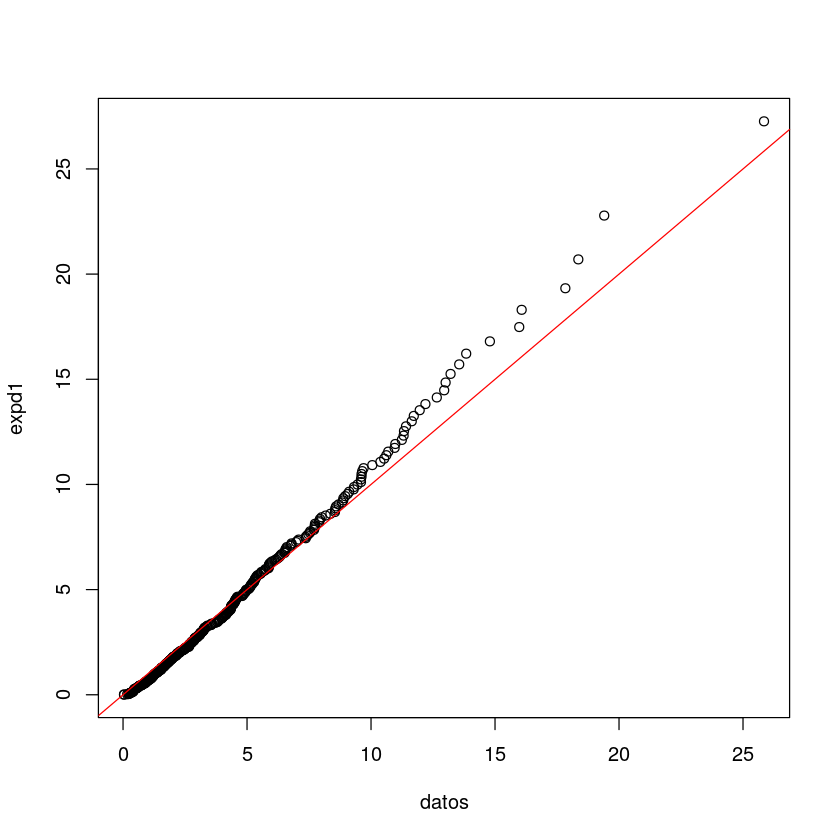

In [34]:
# Graficamos un q-q plot
# https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot
# Generamos la función cuantile a partir del parámetro estimado
expd1 <- qexp(ppoints(length(datos)), rate = fitexp$estimate)

# Graficamos el qqplot para los datos observados vs. los v.a. generados
# en la línea anterior
qqplot(datos, expd1)
abline(a=0, b=1,col = "red")

Fitting data to normal, weibull and exponential distributions
Observations: 
Mean: 3.808761 
Median: 2.827011 
std_dev: 3.579281 


Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”

For Exponential distribution p-value is: 0.5204917 
For Normal distribution p-value is: 2.07471e-09 
For Weibull distribution p-value is: 0.9367207 


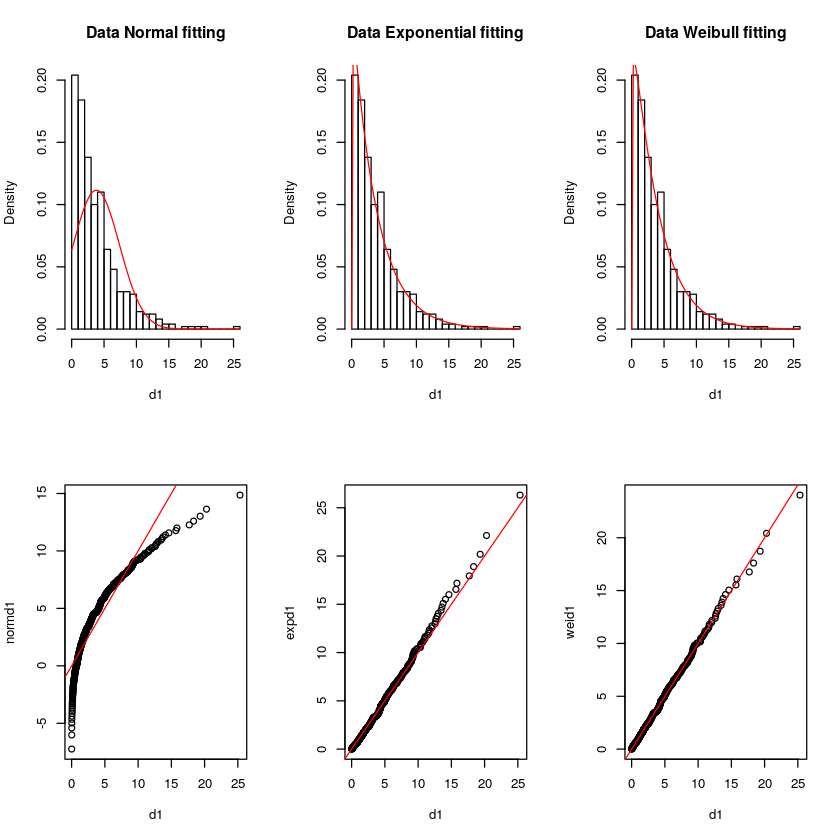

In [57]:
fit_dist <- function(d1){

    library(vcd)
    library(MASS)
    library(car)

    cat("Fitting data to normal, weibull and exponential distributions\n")

    #Calculating data mean
    m_d1<-mean(d1)

    #Calculating data mean
    med_d1<-median(d1)

    #Caculating standard distribution
    sd_d1<-sd(d1)
    #Getting number of observations
    obs<-dim(d1)[2]

    #Printing mean and std_dev
    cat("Observations:",obs,"\nMean:",m_d1,"\nMedian:",med_d1,"\nstd_dev:",sd_d1,"\n")

    #Plotting histogram
    #hist(d1)

    # estimate the parameters of the distributions
    fitexp <- fitdistr(d1, "exponential") 
    fitnorm <- fitdistr(d1, "normal")
    fitweib <- fitdistr(d1, "weibull")

    # Goodness of fit test using Kolmogorov-Smirnov test
    # p-value > 0.05 -> distribution not refused
    # The smaller this number is, the less likely that x=y is true
    kse <- ks.test(d1, "pexp", fitexp$estimate)
    cat("For Exponential distribution p-value is:",kse[[2]],"\n")

    ksn <- ks.test(d1, "pnorm", mean = t(fitnorm$estimate)[1], sd = t(fitnorm$estimate)[2]) 
    cat("For Normal distribution p-value is:",ksn[[2]],"\n")

    ksw <- ks.test(d1, "pweibull", shape=t(fitweib$estimate)[1], scale = t(fitweib$estimate)[2]) 
    cat("For Weibull distribution p-value is:",ksw[[2]],"\n")

    # Prints plot to postscript file, comment next line for screen only
    # postscript(file="output.eps", height=6, width=8, horizontal=F, onefile=F)

    # plot a graph for normal
    par(mfrow=c(2,3))
    hist(main = "Data Normal fitting", d1, freq = FALSE,breaks = 30)
    curve(dnorm(x, mean = t(fitnorm$estimate)[1], sd = t(fitnorm$estimate)[2]), col = "red", add = TRUE)

    # plot a graph for exponential
    hist(main = "Data Exponential fitting",d1, freq = FALSE,breaks = 30)
    curve(dexp(x, rate = fitexp$estimate), col = "red", add = TRUE)

    # plot a graph for weibull
    hist(main = "Data Weibull fitting",d1, freq = FALSE,breaks = 30)
    curve(dweibull(x, shape=t(fitweib$estimate)[1], scale = t(fitweib$estimate)[2]), col = "red", add = TRUE)

    #qqnorm(d1)
    #qqline(d1,col="red")

    normd1 <- qnorm(ppoints(length(d1)), mean = t(fitnorm$estimate)[1], sd = t(fitnorm$estimate)[2])
    qqplot(d1, normd1)
    abline(a=0, b=1,col = "red")

    expd1 <- qexp(ppoints(length(d1)), rate = fitexp$estimate)
    qqplot(d1, expd1)
    abline(a=0, b=1,col = "red")

    weid1 <- qweibull(ppoints(length(d1)), shape=t(fitweib$estimate)[1], scale = t(fitweib$estimate)[2])
    qqplot(d1, weid1)
    abline(a=0, b=1,col = "red")

    # Prints plot to pdf file, comment the 2 folloing lines for screen only
    # dev.copy2pdf(file="output.pdf")
    # dev.off()

}

fit_dist(datos)

In [58]:
# De las diapositivas del profesor Iván Mura

library(fitdistrplus)
data("groundbeef", package = "fitdistrplus")
summary(groundbeef)

Loading required package: survival


    serving      
 Min.   : 10.00  
 1st Qu.: 50.00  
 Median : 79.00  
 Mean   : 73.65  
 3rd Qu.:100.00  
 Max.   :200.00  

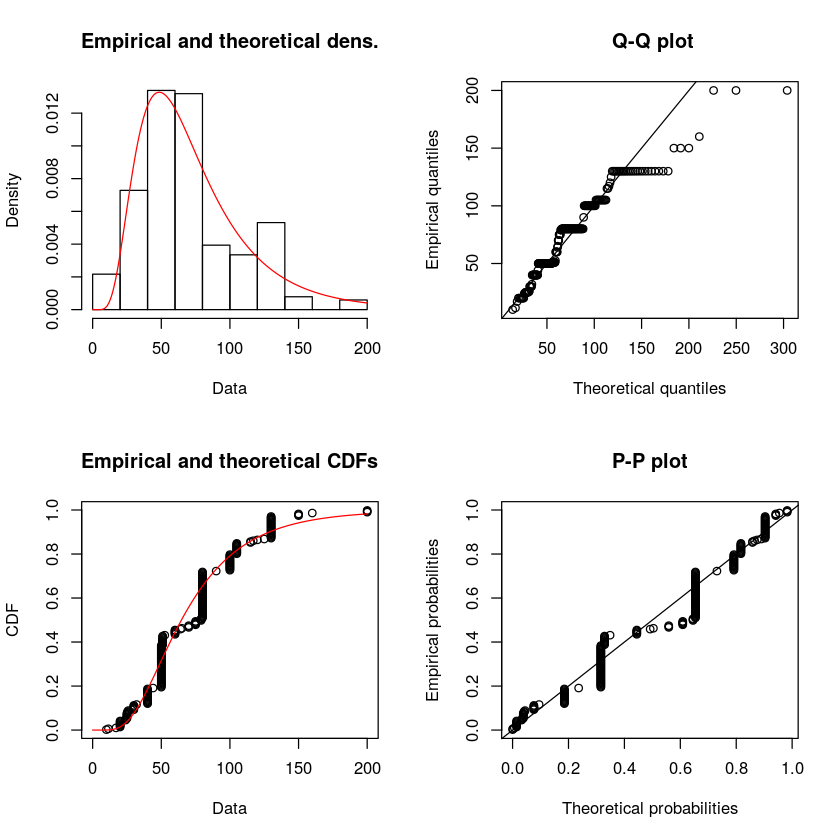

In [59]:
fln<-fitdist(unlist(groundbeef), "lnorm")
plot(fln)